In [33]:
%load_ext version_information
%version_information numpy, scipy, sklearn, pandas, matplotlib, seaborn

Software versions
Python 3.6.4 64bit [MSC v.1900 64 bit (AMD64)]
IPython 6.2.1
OS Windows 10 10.0.17134 SP0
numpy 1.14.0
scipy 1.0.0
sklearn 0.19.1
pandas 0.23.3
matplotlib 2.1.2
seaborn 0.8.1
Wed Aug 08 13:34:24 2018 ¢¥eCN©öI¡¾©ö C¡ÍA¨ª¨öA

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import inspect
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris #datasets
from sklearn.datasets import load_digits

from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler #전처리
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split #데이터 split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import validation_curve,learning_curve
import mglearn

from sklearn.metrics import confusion_matrix, roc_curve, auc # 성능평가 및 검증
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn_evaluation import plot

from sklearn.neighbors import KNeighborsClassifier# 알고리즘
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

import warnings
warnings.filterwarnings('ignore')

- sklearn.datasets
    - load_: 저장되어 불러온 데이터
    - fetch_: 크기 커서 웹에서 가져온 데이터
    - make_: 임의로 생성한 데이터
    
    
- import _Classifier_ : cat 분류기
- import _Regressor_: 수치 Regressor

In [2]:
type(load_iris) #function이다

function

In [11]:
print(inspect.getsource(load_iris)) # inspect 모듈의 getsource

def load_iris(return_X_y=False):
    """Load and return the iris dataset (classification).

    The iris dataset is a classic and very easy multi-class classification
    dataset.

    =================   ==============
    Classes                          3
    Samples per class               50
    Samples total                  150
    Dimensionality                   4
    Features            real, positive
    =================   ==============

    Read more in the :ref:`User Guide <datasets>`.

    Parameters
    ----------
    return_X_y : boolean, default=False.
        If True, returns ``(data, target)`` instead of a Bunch object. See
        below for more information about the `data` and `target` object.

        .. versionadded:: 0.18

    Returns
    -------
    data : Bunch
        Dictionary-like object, the interesting attributes are:
        'data', the data to learn, 'target', the classification labels,
        'target_names', the meaning of the labels, 'feature_name

In [2]:
data = load_iris()

In [3]:
type(data) # Bunch: dict을 확장해 attrib 방식으로 접근 가능해짐

sklearn.utils.Bunch

In [5]:
data.__dict__

{}

In [6]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [7]:
print(data.DESCR[:500])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

  


In [4]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
iris1 = pd.DataFrame(data.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
iris2 = pd.DataFrame(data.target)

In [14]:
iris2.head(3)

,0
0,0
1,0
2,0


In [18]:
iris2.rename({0:'target'},axis=1,inplace=True) # mapper = {0:'target'}과같이 dict으로 지정 (colname을 0->'target')

In [19]:
iris = pd.concat((iris1,iris2), axis=1)
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,target
48,5.3,3.7,1.5,0.2,0
7,5.0,3.4,1.5,0.2,0
44,5.1,3.8,1.9,0.4,0
87,6.3,2.3,4.4,1.3,1
129,7.2,3.0,5.8,1.6,2


In [20]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
target          150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [21]:
iris.target=iris.target.astype('category')

In [22]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [23]:
iris.describe(include='category')

,target
count,150
unique,3
top,2
freq,50


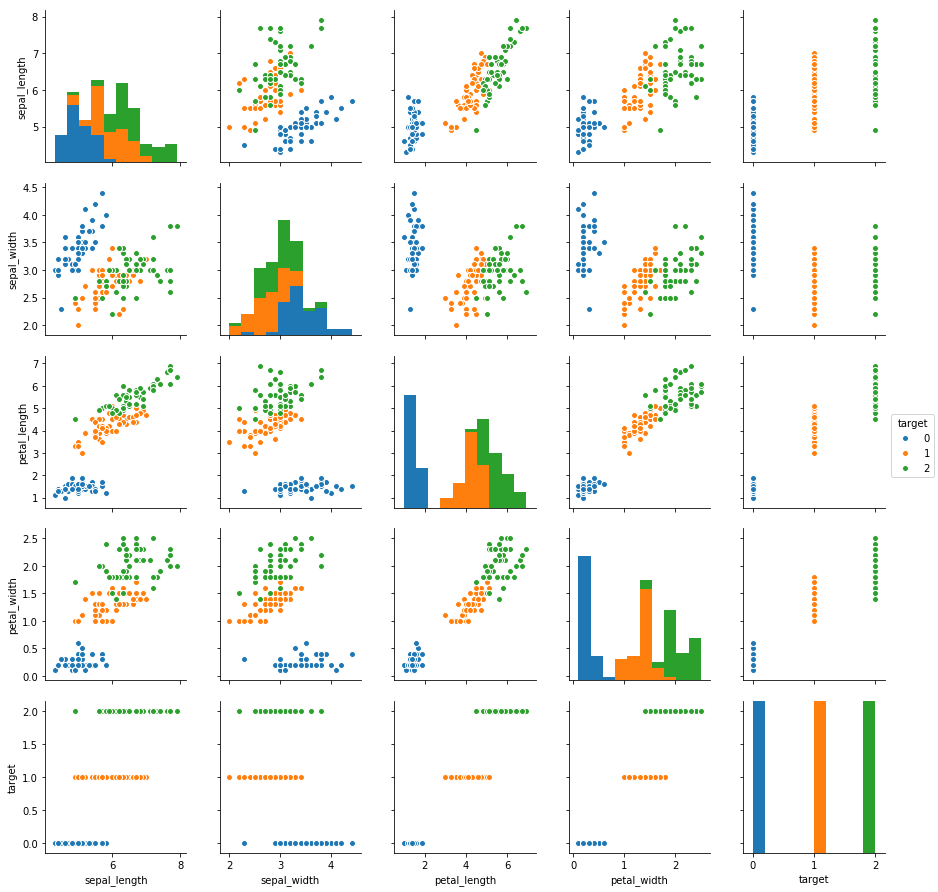

In [24]:
sns.pairplot(iris, hue = 'target')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000133CB76D518>,
      dtype=object)

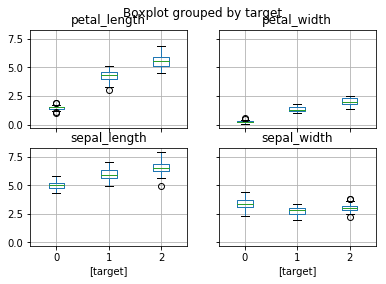

In [17]:
iris.boxplot(by='target')

#### Data Split
- HoldOut과 교차검증
    - HoldOut시 학습안된 부분 때문에 성능떨어지는 경우 존재 -> cv, gridsearch 이후 평가까지하고 전체 데이터로 다시 학습하여 해결 -> 이후 서비스
    - Validation Set: 최근 동향은 test set을 validation과 test로 나누어 val가지고 모델적합시킨 뒤 test로 검증

In [25]:
X = iris.drop(columns='target')
y = iris.target

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state =180807 )

__Encoding__

인코딩 필요한 경우(categorical dtype) sklearn.preprocessing 의 인코더 클래스 사용
- one-hot
- label

In [32]:
oe = OneHotEncoder()
oe.fit_transform(X,y) # matrix형태

<150x15 sparse matrix of type '<class 'numpy.float64'>'
	with 600 stored elements in Compressed Sparse Row format>

In [38]:
le = LabelEncoder()
le.fit_transform(y) # 1Darray 형태

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [48]:
iris_encoded = {}
for col in iris.columns:
#     print(iris[col].dtype.__class__)
    if issubclass(iris[col].dtype.__class__,pd.core.dtypes.dtypes.CategoricalDtype):
        print(col,'is categorical!!')
        le = LabelEncoder()
        iris_encoded[col] = le.fit_transform(iris[col])
    else:
        iris_encoded[col] = iris[col].values

target is categorical!!


In [49]:
iris_encoded

{'petal_length': array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
        1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
        1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3,
        1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
        4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
        4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
        4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
        4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
        5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
        6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
        6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
        5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1]),
 'petal_width': array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
        0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 

#### KNN

In [20]:
knn = KNeighborsClassifier()

In [21]:
# knn.__dict__ # json형태로 바로 모델저장도 가능

In [22]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
confusion_matrix(y_test, knn.predict(X_test))

array([[13,  0,  0],
       [ 0, 17,  2],
       [ 0,  1, 12]], dtype=int64)

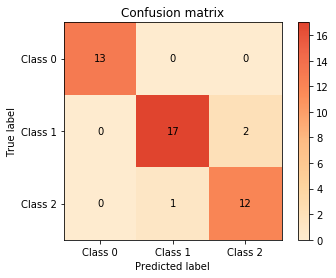

In [15]:
plot.confusion_matrix(y_test, knn.predict(X_test))

In [14]:
knn.predict_proba([[3,3,3,3]]) #확률을 predict

array([[0., 1., 0.]])

In [15]:
knn.score(X_test,y_test) #accuracy

0.9333333333333333

In [17]:
print(classification_report(y_test, knn.predict(X_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       0.94      0.89      0.92        19
          2       0.86      0.92      0.89        13

avg / total       0.94      0.93      0.93        45



DummyClassifier를 이용한 accuracy와 비교

In [113]:
dummy = DummyClassifier(strategy='stratified')
dummy.fit(X_train,y_train)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [112]:
dummy.score(X_test,y_test)

0.3111111111111111

#### DecisionTree

In [18]:
tree = DecisionTreeClassifier()

In [19]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
confusion_matrix(y_test, tree.predict(X_test))

array([[13,  0,  0],
       [ 0, 16,  3],
       [ 0,  1, 12]], dtype=int64)

In [21]:
tree.score(X_test,y_test) #accuracy

0.9111111111111111

In [22]:
print(classification_report(y_test, knn.predict(X_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       0.94      0.89      0.92        19
          2       0.86      0.92      0.89        13

avg / total       0.94      0.93      0.93        45



#### 예제: digits

In [16]:
digits = load_digits()
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [30]:
digits.data.shape

(1797, 64)

In [31]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [42]:
np.bincount(digits.target) # pd의 value_count

array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64)

In [35]:
img =digits.data[0]

img = img.reshape((8,8))

0


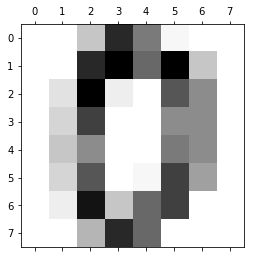

In [44]:
print(digits.target[0])
plt.matshow(img, cmap = plt.cm.Greys)

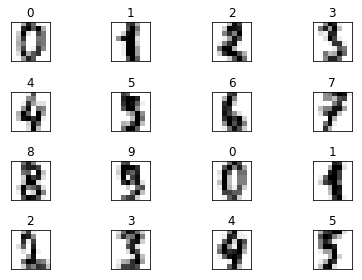

In [48]:
fig, axes = plt.subplots(4,4)
for x,y, ax in zip(digits.data, digits.target, axes.ravel()):
    ax.set_title(y)
    ax.imshow(x.reshape(8,8), cmap='gray_r')
    ax.set_xticks(())
    ax.set_yticks(())
plt.tight_layout()

In [24]:
X_train,X_test,y_train,y_test = train_test_split(digits.data,digits.target,  test_size=0.3, random_state =180808 )

#### 스케일링
https://datascienceschool.net/view-notebook/f43be7d6515b48c0beb909826993c856/

- scale(X): 기본 스케일. 평균과 표준편차 사용
- robust_scale(X): 중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화
- minmax_scale(X): 최대/최소값이 각각 1, 0이 되도록 스케일링
- maxabs_scale(X): 최대절대값과 0이 각각 1, 0이 되도록 스케일링


- scale과 normalization은 완전히 서로 다른 작업이다
    - scale한 데이터는 scale parameter를 알고 있으면 다시 원래대로 되돌릴 수 있다. normalization한 데이터는 데이터 각각의 원래 크기를 알아야지만 원래대로 되돌릴 수 있다
    - 5개의 영화에 대한 평점을 줄 때, (1, 1, 2, 3, 1)이나 (2, 2, 3, 4, 2)나 같은 것으로 보기 위해서는 normalization을 한다
    - MinMax scale의 경우는 noramalize까지 되는 경우이다

In [25]:
# scaler = StandardScaler()
# scaler = MinMaxScaler()
scaler = RobustScaler()


In [26]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#### SVM

In [27]:
svm_clf = svm.SVC()
tuned_parameters = {
 'C': [10, 100] , 'kernel': ['linear'],
 'C': [10, 100] , 'gamma': [0.0005,0.001,0.0015], 'kernel': ['rbf'],
 #'degree': [2,3] ,'gamma':[0.0005,0.001,0.0015], 'C':[10, 100] , 'kernel':['poly']
                   }

In [28]:
svm_model = GridSearchCV(svm_clf,param_grid=tuned_parameters,cv=10,scoring='accuracy')

In [29]:
svm_model.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [10, 100], 'kernel': ['rbf'], 'gamma': [0.0005, 0.001, 0.0015]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [30]:
svm_model.best_params_

{'C': 10, 'gamma': 0.0015, 'kernel': 'rbf'}

In [31]:
svm_model.score(X_test,y_test)

0.9851851851851852

In [123]:
svm_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [10, 100], 'kernel': ['rbf'], 'gamma': [0.0005, 0.001, 0.0015]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [124]:
svm_model.score(X_test_scaled,y_test)

0.9703703703703703

#### PCA

In [141]:
pca = PCA(n_components=8)

In [142]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)
X_train_pca.shape

(1257, 8)

In [143]:
svm_model.fit(X_train_pca,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [10, 100], 'kernel': ['rbf'], 'gamma': [0.0005, 0.001, 0.0015]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [144]:
svm_model.score(X_test_pca,y_test)

0.3314814814814815

#### CV

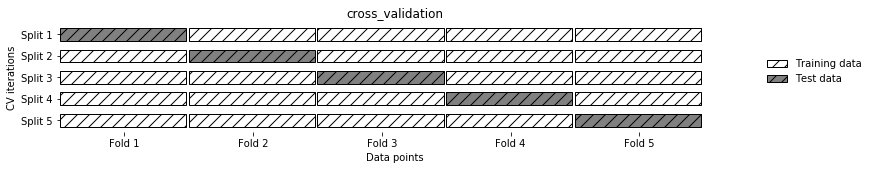

In [6]:
mglearn.plots.plot_cross_validation() # 모든 데이터를 사용해 학습, 파라미터 튜닝 위한 경우 많음(GridSearchCV)

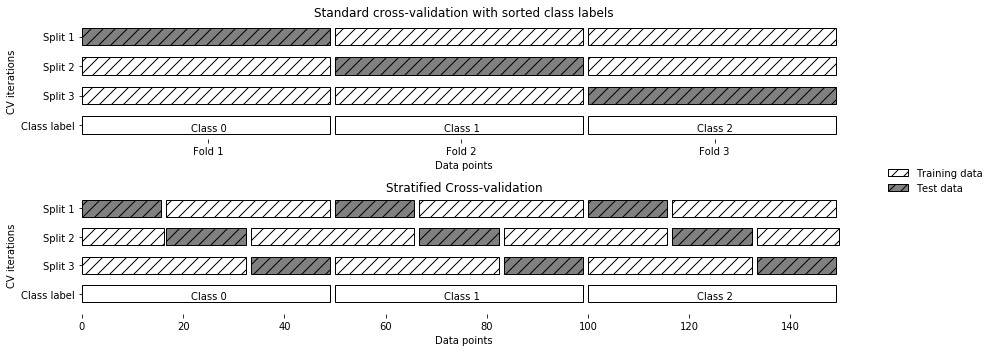

In [7]:
mglearn.plots.plot_stratified_cross_validation() #클래스별로 층화추출

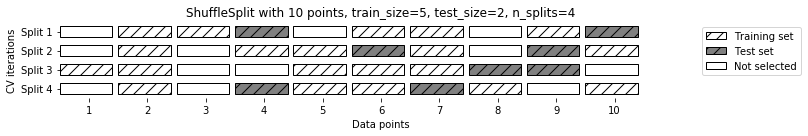

In [8]:
mglearn.plots.plot_shuffle_split() #데이터가 너무작을때

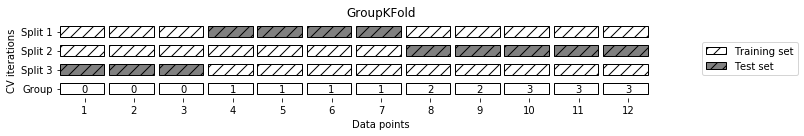

In [9]:
mglearn.plots.plot_group_kfold()

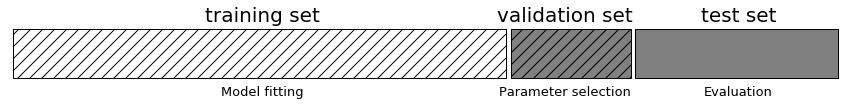

In [10]:
mglearn.plots.plot_threefold_split()

In [12]:
kfold = KFold(10, shuffle=True)

In [32]:
cross_val_score(svm_model,X_train,y_train,cv=kfold)

array([1.        , 0.97619048, 0.99206349, 0.98412698, 1.        ,
       0.99206349, 1.        , 0.992     , 1.        , 1.        ])

In [30]:
train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(),X_train,y_train)

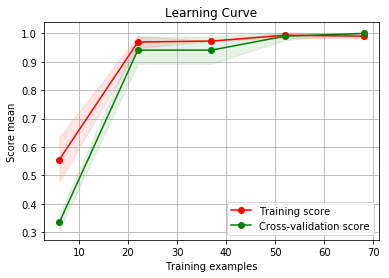

In [31]:
plot.learning_curve(train_scores, test_scores,train_sizes)

In [32]:
train_scores, test_scores = validation_curve(KNeighborsClassifier(),X_train,y_train,'n_neighbors',[2,3,4,5,6])

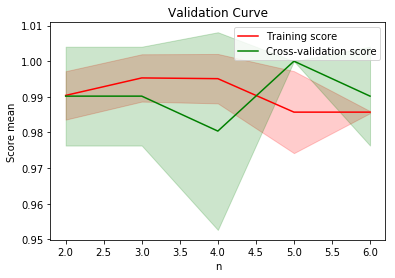

In [33]:
plot.validation_curve(train_scores,test_scores, [2,3,4,5,6],'n')

### GridSearchCV

In [12]:
data = load_iris()

In [17]:
knn = KNeighborsClassifier()
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [24]:
param_grid = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14]}

In [25]:
knn_grid = GridSearchCV(knn,param_grid = param_grid,cv=10)

In [26]:
knn_grid.fit(data.data,data.target)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [27]:
knn_grid.best_params_

{'n_neighbors': 13}

In [28]:
knn_grid.best_score_

0.98

In [31]:
knn_grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

In [30]:
knn_grid.cv_results_

{'mean_fit_time': array([0.00078077, 0.00075209, 0.00063596, 0.00069077, 0.0005342 ,
        0.00049441, 0.00045149, 0.00058646, 0.00077951, 0.00073495,
        0.00070994, 0.00060537, 0.00089915, 0.00076122]),
 'mean_score_time': array([0.0009938 , 0.00115905, 0.00103791, 0.0009685 , 0.0009922 ,
        0.00099494, 0.00091865, 0.00093982, 0.00099552, 0.00099211,
        0.00118177, 0.00104628, 0.00098941, 0.00108457]),
 'mean_test_score': array([0.96      , 0.95333333, 0.96666667, 0.96666667, 0.96666667,
        0.96666667, 0.96666667, 0.96666667, 0.97333333, 0.96666667,
        0.96666667, 0.97333333, 0.98      , 0.97333333]),
 'mean_train_score': array([1.        , 0.97851852, 0.96074074, 0.9637037 , 0.96888889,
        0.97259259, 0.97333333, 0.97925926, 0.97925926, 0.9762963 ,
        0.98      , 0.97851852, 0.98      , 0.97925926]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
              mask=[False, False, False, False, False, False